In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
fc = pd.read_csv("Fraud_check.csv")

In [3]:
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fc.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fc[fc['Taxable.Income']<=30000]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
10,NO,Single,29732,102602,19,YES
12,NO,Divorced,11794,148033,14,YES
16,YES,Divorced,24987,34551,29,NO
19,NO,Single,10987,126953,30,YES
21,YES,Divorced,14310,29106,7,YES
...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES
557,YES,Married,12810,157421,10,NO
567,YES,Single,16316,129912,30,NO
575,NO,Divorced,10735,95975,13,YES


In [6]:
gp=['Risky','Good']
fc['Fraudcheck']=pd.cut(fc['Taxable.Income'],bins=[0,30000,1000000],labels=gp)

In [7]:
for i in range(0,len(fc['Taxable.Income'])):
    if fc['Taxable.Income'][i]<=30000:
        fc['Fraudcheck'][i] = 'Risky'
    else:
        fc['Fraudcheck'][i]='Good'

In [8]:
fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraudcheck
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [9]:
fc['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [10]:
fc['Fraudcheck'].value_counts()

Good     476
Risky    124
Name: Fraudcheck, dtype: int64

In [11]:
fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraudcheck
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [12]:
fc['Fraudcheck']=fc['Fraudcheck'].replace(['Risky','Good'],[0,1])
fc['Urban']=fc['Urban'].replace(['YES','NO'],[1,0])
fc['Undergrad']=fc['Undergrad'].replace(['YES','NO'],[1,0])
fc['Marital.Status']=fc['Marital.Status'].replace(['Single','Divorced','Married'],[0,1,2])

In [13]:
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraudcheck
0,0,0,68833,50047,10,1,1
1,1,1,33700,134075,18,1,1
2,0,2,36925,160205,30,1,1
3,1,0,50190,193264,15,1,1
4,0,2,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,1,76340,39492,7,1,1
596,1,1,69967,55369,2,1,1
597,0,1,47334,154058,0,1,1
598,1,2,98592,180083,17,0,1


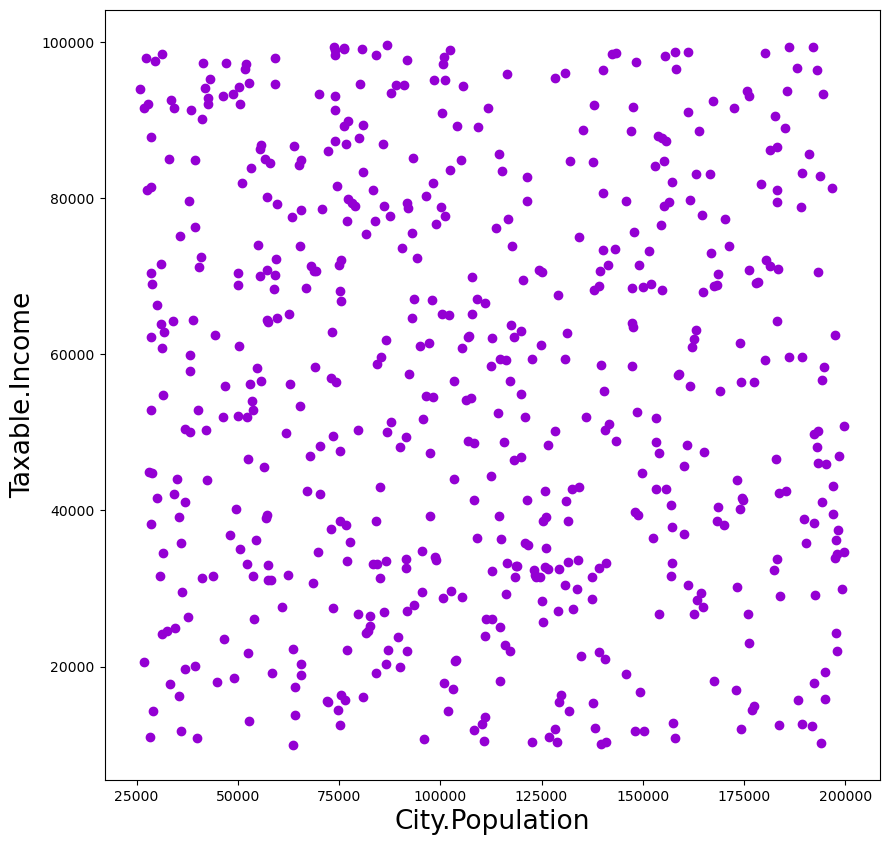

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(fc['City.Population'],fc['Taxable.Income'],color='darkviolet')
plt.ylabel("Taxable.Income",size=19)
plt.xlabel("City.Population",size=19)
plt.show()

In [15]:
fc['Fraudcheck'].value_counts()

1    476
0    124
Name: Fraudcheck, dtype: int64

In [16]:
fc['Marital.Status'].value_counts()

0    217
2    194
1    189
Name: Marital.Status, dtype: int64

In [17]:
fc['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

# SPLITTING THE DATA

In [18]:
fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraudcheck
0,0,0,68833,50047,10,1,1
1,1,1,33700,134075,18,1,1
2,0,2,36925,160205,30,1,1
3,1,0,50190,193264,15,1,1
4,0,2,81002,27533,28,0,1


In [19]:
fc.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Fraudcheck'],
      dtype='object')

In [20]:
fc1=fc[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban','Fraudcheck']]

In [21]:
fc1.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Fraudcheck
0,0,0,50047,10,1,1
1,1,1,134075,18,1,1
2,0,2,160205,30,1,1
3,1,0,193264,15,1,1
4,0,2,27533,28,0,1


In [22]:
X=fc1.iloc[:,:-1]
Y=fc1.iloc[:,-1]

In [23]:
X.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,1,134075,18,1
2,0,2,160205,30,1
3,1,0,193264,15,1
4,0,2,27533,28,0


In [24]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Fraudcheck, dtype: category
Categories (2, int64): [0 < 1]

In [25]:
fc1.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'Fraudcheck'],
      dtype='object')

# SPLITTING DATA INTO TRAIN AND TEST

In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((480, 5), (120, 5), (480,), (120,))

In [27]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
284,0,1,188383,22,1
423,0,2,80249,19,1
525,1,0,75307,23,0
519,1,0,162102,25,1
12,0,1,148033,14,1
...,...,...,...,...,...
369,0,2,89122,28,0
320,1,0,78897,11,1
527,0,2,180274,27,0
125,1,1,155669,11,0


In [28]:
y_train

284    0
423    1
525    1
519    1
12     0
      ..
369    1
320    1
527    1
125    1
265    0
Name: Fraudcheck, Length: 480, dtype: category
Categories (2, int64): [0 < 1]

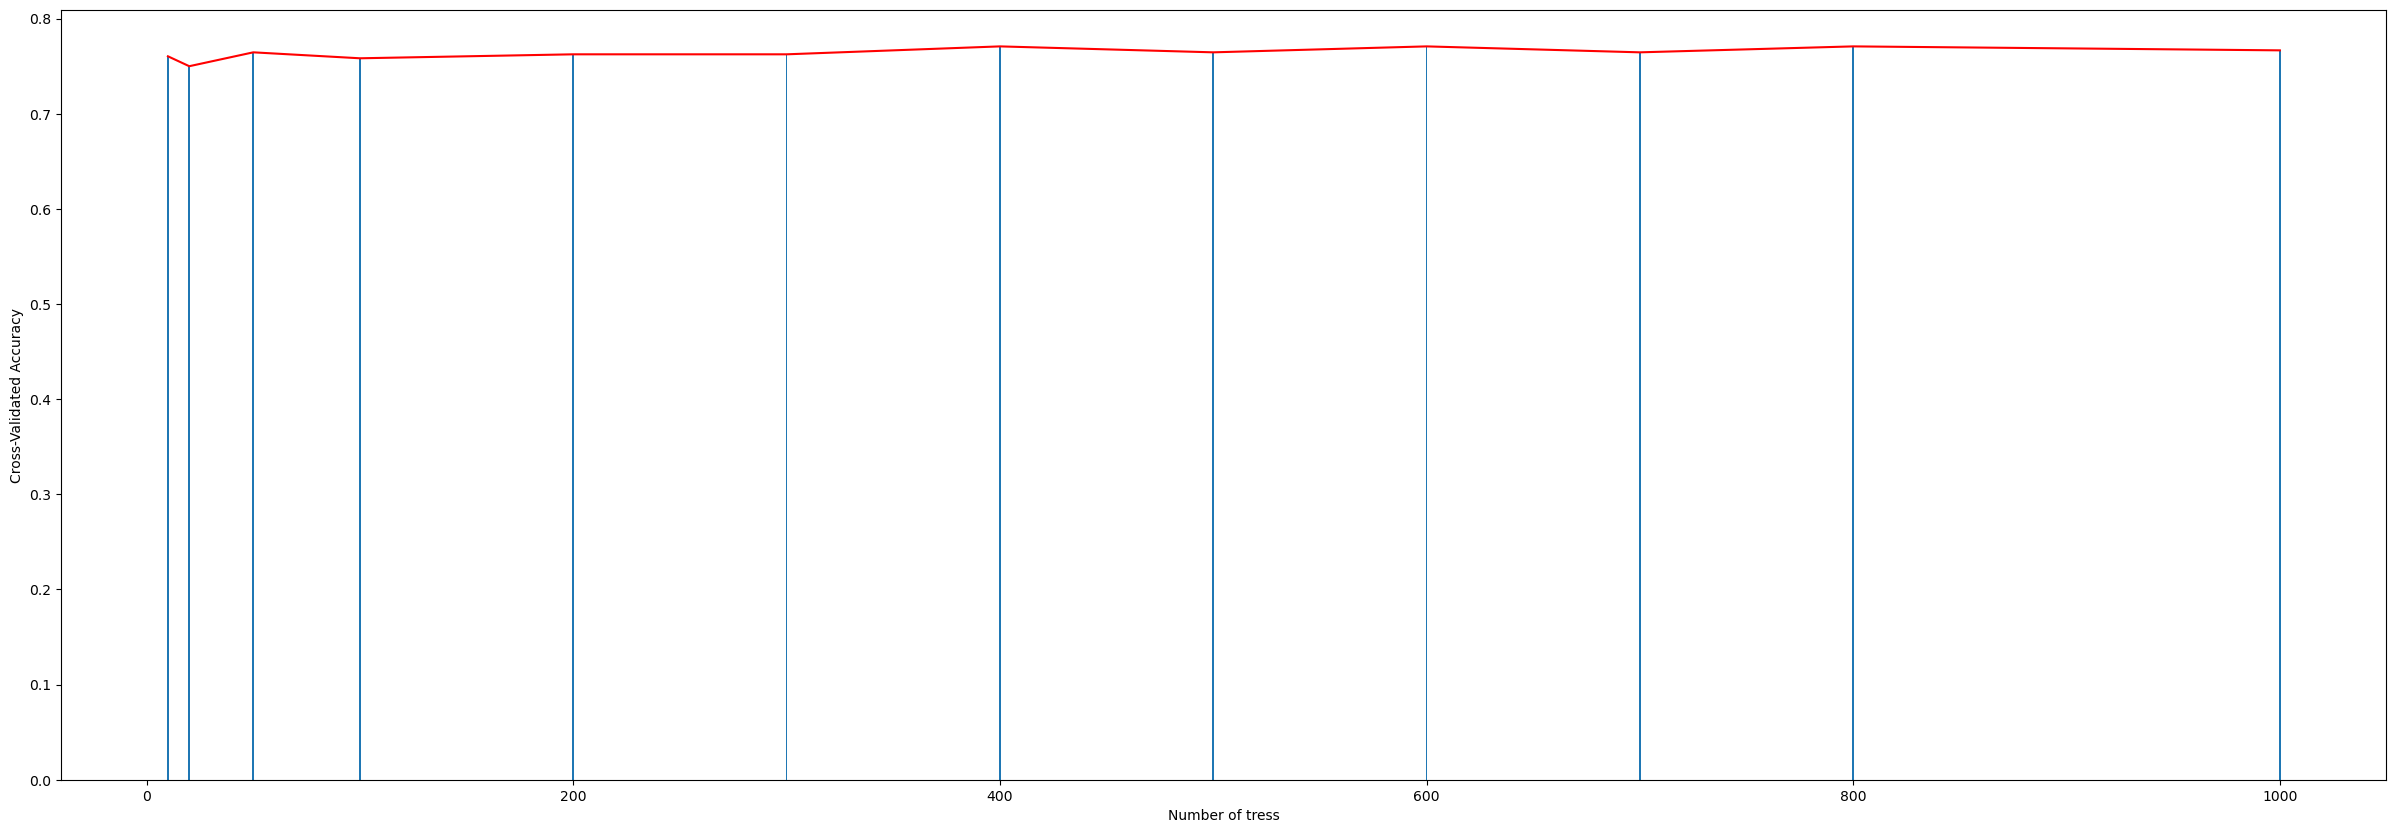

In [47]:
import matplotlib.pyplot as plt 
%matplotlib inline
num_trees = [10,20,50,100,200,300,400,500,600,700,800,1000]
nf=[2,3,4,5,6]
k_scores = []




for k in num_trees:

    rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(rf, x_train, y_train, cv=10)
    k_scores.append(scores.mean())

plt.figure(figsize=(30,10))
plt.bar(num_trees, k_scores)
plt.plot(num_trees, k_scores,color="red")

plt.xlabel('Number of tress')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# GRID SEARCH CV TO FIND BEST HYEPRPARAMETER

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
model=RandomForestClassifier()
parameters={
    
    "n_estimators":[130,140,150,160],
    "max_features":[2,3,4,5]
}

In [50]:
G_dt=GridSearchCV(model,parameters,cv=10)


In [51]:
G_dt.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4, 5],
                         'n_estimators': [130, 140, 150, 160]})

In [52]:
G_dt.best_score_

0.7708333333333333

In [53]:
G_dt.best_params_

{'max_features': 3, 'n_estimators': 150}

In [54]:
model3=RandomForestClassifier(max_features=2, n_estimators=130)

In [55]:
model3.fit(x_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=130)

In [57]:
print(classification_report(y_test,model3.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        94
           1       0.00      0.00      0.00        26

    accuracy                           0.71       120
   macro avg       0.38      0.45      0.41       120
weighted avg       0.60      0.71      0.65       120



In [58]:
model3.feature_importances_

array([0.03690261, 0.06435202, 0.53052201, 0.33062852, 0.03759484])

# GINI INDEX WITH TREE ESTIMATORS

In [59]:
model=DecisionTreeClassifier(criterion='gini',min_samples_split=6)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=6)

In [60]:
pred=G_dt.predict(x_test)
pd.Series(pred).value_counts()

0    111
1      9
dtype: int64

In [61]:
metrics.accuracy_score(y_test,pred)

0.7083333333333334

In [62]:

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        94
           1       0.00      0.00      0.00        26

    accuracy                           0.71       120
   macro avg       0.38      0.45      0.41       120
weighted avg       0.60      0.71      0.65       120



In [63]:
print(confusion_matrix(y_test,pred))

[[85  9]
 [26  0]]


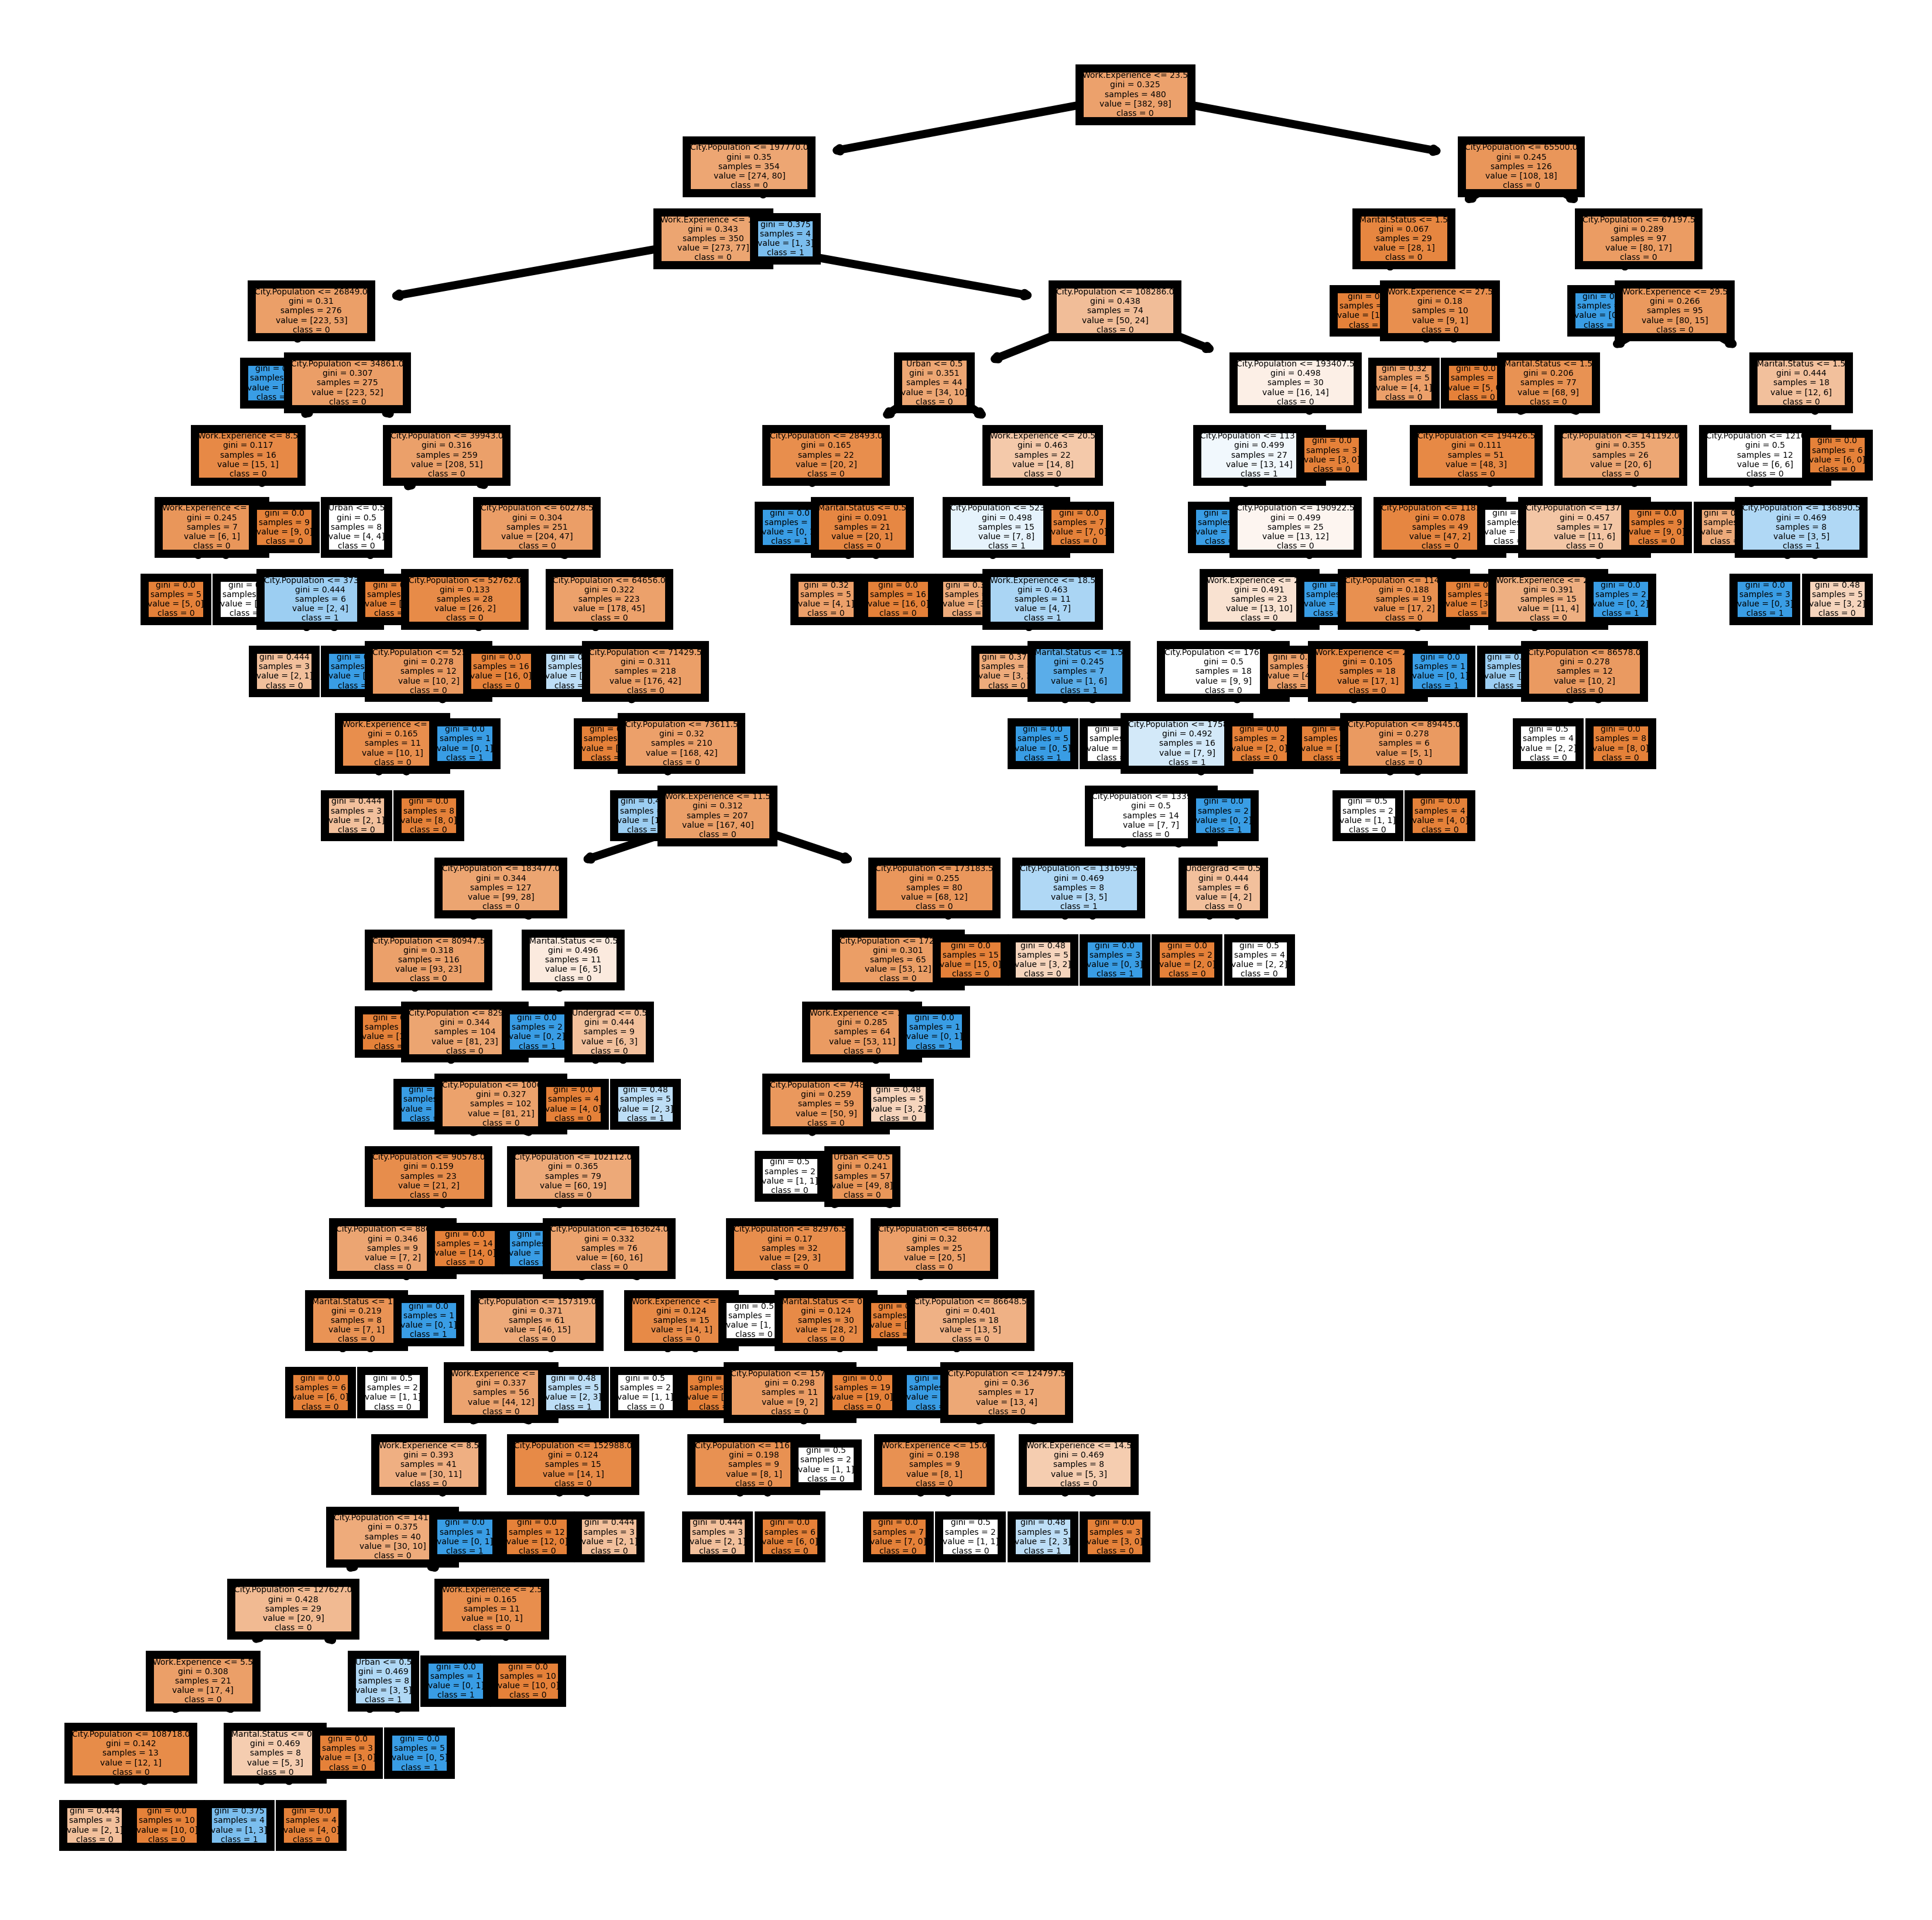

In [64]:
fe=['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience','Urban']
ta=['0','1']
fig,axes=plt.subplots(figsize=(4,4),dpi=1000)
tree.plot_tree(model,feature_names=fe,class_names=ta,filled=True);
plt.show()